In [1]:
# 获取数据
%reload_ext autoreload
%autoreload 2
import sys
# 替换为fun.py实际所在的绝对路径（比如："D:/projects/common_code"） D:\桌面\策略\fun.py
sys.path.append("D://桌面/策略")
from fun import *
import polars as pl
import pandas as pd
import datetime as dt
import time 


start_date = dt.date(2021,1,1)
end_date = dt.date(2025,11,1)

# 获取指定日期的日线数据
stock_data = read_day_data(start_date=start_date,end_date=end_date,file_path='ts_stock_all_data',fields=['code','trading_date','name','open','high','low','close','pre_close','volume','amount','float_mv'])
stock_data = stock_data.drop_nulls(subset=['open','close','pre_close'])
stock_pivot = stock_data.pivot(index='trading_date',columns='code')
volume = stock_data.pivot(index='trading_date',columns='code',values='volume') # 用于计算因子
close = stock_data.pivot(index='trading_date',columns='code',values='close') # 用于计算收益率
close



C:\Users\20561\AppData\Local\Temp\ipykernel_37276\1574947435.py:20: DeprecationWarning: the argument `columns` for `DataFrame.pivot` is deprecated. It was renamed to `on` in version 1.0.0.
  stock_pivot = stock_data.pivot(index='trading_date',columns='code')
C:\Users\20561\AppData\Local\Temp\ipykernel_37276\1574947435.py:21: DeprecationWarning: the argument `columns` for `DataFrame.pivot` is deprecated. It was renamed to `on` in version 1.0.0.
  volume = stock_data.pivot(index='trading_date',columns='code',values='volume') # 用于计算因子
C:\Users\20561\AppData\Local\Temp\ipykernel_37276\1574947435.py:22: DeprecationWarning: the argument `columns` for `DataFrame.pivot` is deprecated. It was renamed to `on` in version 1.0.0.
  close = stock_data.pivot(index='trading_date',columns='code',values='close') # 用于计算收益率


trading_date,SHSE.600000,SHSE.600004,SHSE.600006,SHSE.600007,SHSE.600008,SHSE.600009,SHSE.600010,SHSE.600011,SHSE.600012,SHSE.600015,SHSE.600016,SHSE.600017,SHSE.600018,SHSE.600019,SHSE.600020,SHSE.600021,SHSE.600022,SHSE.600023,SHSE.600025,SHSE.600026,SHSE.600027,SHSE.600028,SHSE.600029,SHSE.600030,SHSE.600031,SHSE.600033,SHSE.600035,SHSE.600036,SHSE.600037,SHSE.600038,SHSE.600039,SHSE.600048,SHSE.600050,SHSE.600051,SHSE.600052,SHSE.600053,…,SZSE.001400,SZSE.301560,SHSE.688755,SZSE.301636,SHSE.603014,SZSE.301595,SZSE.001390,SHSE.603049,SZSE.301590,SHSE.688775,SHSE.603382,SHSE.603400,SZSE.301678,SZSE.001388,SHSE.688729,SZSE.301630,SHSE.600930,SHSE.603262,SZSE.301609,SZSE.001221,SZSE.301491,SHSE.603406,SZSE.301632,SHSE.603370,SZSE.301575,SHSE.603418,SZSE.301584,SZSE.301656,SZSE.301668,SZSE.001285,SZSE.301563,SHSE.601026,SZSE.001386,SHSE.603175,SHSE.688759,SHSE.688765,SHSE.688783
date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2021-01-04,9.69,14.04,9.22,12.4,2.86,77.49,1.18,4.5,6.06,6.21,5.2,2.9,4.69,6.09,3.51,7.11,1.43,3.62,4.47,6.76,3.37,4.03,5.9,29.18,34.8,2.63,2.91,43.17,9.09,66.66,4.65,15.29,4.33,9.01,3.02,19.57,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2021-01-05,9.68,13.81,8.88,12.56,2.86,77.3,1.17,4.4,6.1,6.26,5.17,2.95,4.69,5.94,3.39,7.11,1.41,3.59,4.36,6.77,3.31,4.02,5.85,29.14,36.55,2.64,2.91,42.18,9.15,66.5,4.57,15.1,4.29,8.89,2.96,18.95,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2021-01-06,9.82,13.54,8.48,12.68,2.84,77.49,1.17,4.43,6.35,6.27,5.19,2.89,4.66,5.95,3.34,7.16,1.4,3.61,4.47,6.67,3.34,4.11,5.75,29.62,36.96,2.66,2.9,44.15,9.0,67.04,4.49,15.23,4.39,8.64,2.9,18.71,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2021-01-07,9.81,12.83,8.43,12.41,2.8,75.85,1.17,4.4,6.1,6.24,5.2,2.86,4.64,6.36,3.31,7.08,1.4,3.56,4.41,6.93,3.29,4.12,5.65,29.75,40.39,2.62,2.86,45.9,8.73,70.42,4.4,15.06,4.28,8.23,2.82,18.56,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2021-01-08,9.83,13.18,8.2,12.4,2.89,75.98,1.17,4.47,6.09,6.25,5.21,2.86,4.79,6.56,3.3,7.18,1.39,3.58,4.37,6.99,3.33,4.19,5.71,30.06,40.37,2.65,2.87,46.6,9.08,67.48,4.63,15.19,4.3,8.24,2.83,18.53,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2025-10-27,12.97,9.55,7.72,20.44,3.31,31.37,2.67,7.75,14.74,6.98,4.09,3.23,5.67,7.27,4.46,27.57,1.64,5.3,10.12,12.08,5.38,5.58,6.6,29.99,22.53,3.57,4.14,41.59,7.89,36.12,8.84,7.48,5.49,7.46,4.99,18.09,…,65.45,37.31,45.27,53.73,null,39.84,27.3,54.6,199.65,302.83,34.07,60.03,76.8,46.3,27.79,200.89,6.45,30.06,50.15,61.15,65.22,46.45,29.59,51.4,58.93,60.96,39.29,29.29,60.27,54.93,240.0,24.75,27.52,83.01,null,null,null
2025-10-28,12.39,9.59,7.66,20.42,3.3,31.5,2.59,7.73,15.03,6.91,4.03,3.25,5.67,7.11,4.59,27.4,1.6,5.25,10.11,12.13,5.37,5.56,6.7,30.0,21.95,3.73,4.17,41.6,7.93,36.43,8.86,7.42,5.46,7.61,4.91,18.13,…,65.22,37.46,45.42,53.42,null,39.33,27.66,53.54,193.7,288.8,33.43,58.37,74.76,45.35,27.29,200.6,6.44,29.8,49.15,62.61,64.33,46.05,28.97,5

In [ ]:
# 1.计算因子
stock_data = stock_data.sort(['code','trading_date'])
stock_data = stock_data.with_columns([
    (pl.col('volume').rolling_mean(window_size=10)).over('code').alias('volume_ma10'),
    (pl.col('volume').rolling_mean(window_size=60)).over('code').alias('volume_ma60'),
    ((pl.col('close').shift(-5) - pl.col('close')) / pl.col('close')*100).over('code').alias('future_return_5d')
])
stock_data = stock_data.with_columns([
    (pl.col('volume_ma10') / pl.col('volume_ma60')).alias('volume_factor'),
])
# 去掉缺失值
stock_data = stock_data.drop_nulls(subset=['volume_factor','future_return_5d'])
stock_data.select(['code','trading_date','name','volume','volume_ma10','volume_ma60','volume_factor','float_mv'])

C:\Users\20561\AppData\Local\Temp\ipykernel_37276\157198218.py:13: DeprecationWarning: the argument `columns` for `DataFrame.pivot` is deprecated. It was renamed to `on` in version 1.0.0.
  factor_data = stock_data.pivot(index='trading_date',columns='code',values='volume_factor')


code,trading_date,name,volume,volume_ma10,volume_ma60,volume_factor,float_mv
str,date,str,f64,f64,f64,f64,f64
"""SHSE.600000""",2021-04-02,"""浦发银行""",653650.57,687495.693,838195.044167,0.82021,3158.29
"""SHSE.600000""",2021-04-06,"""浦发银行""",339112.24,655375.914,833362.425,0.786424,3140.68
"""SHSE.600000""",2021-04-07,"""浦发银行""",609885.4,669236.744,834550.652167,0.801913,3126.0
"""SHSE.600000""",2021-04-08,"""浦发银行""",420478.5,667151.952,831245.073667,0.802594,3128.94
"""SHSE.600000""",2021-04-09,"""浦发银行""",386830.22,662287.312,828177.170333,0.799693,3108.39
…,…,…,…,…,…,…,…
"""SZSE.302132""",2025-10-20,"""中航成飞""",156441.05,215060.367,215064.723833,0.99998,514.04
"""SZSE.302132""",2025-10-21,"""中航成飞""",142701.17,214179.077,213594.6425,1.002736,510.99
"""SZSE.302132""",2025-10-22,"""中航成飞""",123496.85,197338.448,212525.210333,0.928541,495.64


In [3]:
# 2.对因子进行市值中性化处理
from alpha import ols_neutralize
#stock_data = stock_data.sort(['trading_date','code'])
stock_data = stock_data.group_by('trading_date').map_groups(
    lambda df: ols_neutralize(df, y_column='volume_factor', x_columns=['float_mv'])
)
factor_data = stock_data.pivot(index='trading_date',columns='code',values='volume_factor_neutralized').to_pandas()
stock_data = stock_data.sort(['code','trading_date'])
stock_data

2025-12-03 22:32:48,877 - DEBUG - matplotlib data path: d:\Anaconda_envs\envs\quant\lib\site-packages\matplotlib\mpl-data
2025-12-03 22:32:48,884 - DEBUG - CONFIGDIR=C:\Users\20561\.matplotlib
2025-12-03 22:32:48,910 - DEBUG - interactive is False
2025-12-03 22:32:48,911 - DEBUG - platform is win32
2025-12-03 22:32:48,968 - DEBUG - CACHEDIR=C:\Users\20561\.matplotlib
2025-12-03 22:32:48,973 - DEBUG - Using fontManager instance from C:\Users\20561\.matplotlib\fontlist-v390.json


code,trading_date,name,open,high,low,close,pre_close,volume,amount,float_mv,volume_ma10,volume_ma60,future_return_5d,volume_factor,volume_factor_neutralized
str,date,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""SHSE.600000""",2021-04-02,"""浦发银行""",10.94,10.95,10.67,10.76,10.89,653650.57,70413.7147,3158.29,687495.693,838195.044167,-0.27881,0.82021,0.006476
"""SHSE.600000""",2021-04-06,"""浦发银行""",10.76,10.79,10.68,10.7,10.76,339112.24,36356.7283,3140.68,655375.914,833362.425,0.560748,0.786424,-0.015454
"""SHSE.600000""",2021-04-07,"""浦发银行""",10.74,10.75,10.58,10.65,10.7,609885.4,64863.1699,3126.0,669236.744,834550.652167,-0.56338,0.801913,0.002876
"""SHSE.600000""",2021-04-08,"""浦发银行""",10.63,10.7,10.56,10.66,10.65,420478.5,44741.0758,3128.94,667151.952,831245.073667,-2.157598,0.802594,0.007568
"""SHSE.600000""",2021-04-09,"""浦发银行""",10.64,10.64,10.53,10.59,10.66,386830.22,40911.8551,3108.39,662287.312,828177.170333,-0.472144,0.799693,0.004743
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""SZSE.302132""",2025-10-20,"""中航成飞""",87.0,89.38,86.38,87.71,86.0,156441.05,137557.9594,514.04,215060.367,215064.723833,-1.436552,0.99998,0.108852
"""SZSE.302132""",2025-10-21,"""中航成飞""",87.3,88.35,86.16,87.19,87.71,142701.17,124189.8431,510.99,214179.077,213594.6425,3.211377,1.002736,0.113564
"""SZSE.302132""",2025-10-22,"""中航成飞""",86.8,86.8,84.5,84.57,87.19,123496.85,105046.5436,495.64,197338.448,212525.210333,4.859879,0.928541,0.039907


In [4]:
# 3.给因子值加上分组标签
group_num =5
stock_data = stock_data.with_columns([
    pl.col('volume_factor_neutralized').over('trading_date').qcut(quantiles=group_num, labels=[f'group_{i+1}' for i in range(group_num)]).alias('factor_group')
])
stock_data.sort(['trading_date','code']).select(['trading_date','code','volume_factor_neutralized','factor_group'])

trading_date,code,volume_factor_neutralized,factor_group
date,str,f64,cat
2021-04-02,"""SHSE.600000""",0.006476,"""group_4"""
2021-04-02,"""SHSE.600004""",-0.385163,"""group_1"""
2021-04-02,"""SHSE.600006""",-0.480995,"""group_1"""
2021-04-02,"""SHSE.600007""",-0.02871,"""group_3"""
2021-04-02,"""SHSE.600008""",0.812804,"""group_5"""
…,…,…,…
2025-10-24,"""SZSE.301658""",-0.315964,"""group_2"""
2025-10-24,"""SZSE.301662""",-0.21709,"""group_2"""
2025-10-24,"""SZSE.301665""",-0.228052,"""group_2"""


In [ ]:
# 4.计算每日ic
ic = stock_data.group_by('trading_date').agg([
    pl.corr(pl.col('volume_factor_neutralized'), pl.col('future_return_5d')).alias('ic')
])
ic
# 汇报因子的ic,ir值
ic_mean = ic.select(pl.col('ic').mean()).item()
ic_std = ic.select(pl.col('ic').std()).item()
ir = ic_mean / ic_std
print(f'因子IC均值: {ic_mean:.6f}, 因子IR值: {ir:.6f}')

因子IC均值: -0.034018, 因子IR值: -0.364482


In [6]:
group_data = stock_data.sort(['trading_date','factor_group'])
group_return = group_data.group_by(['trading_date','factor_group']).agg([
    pl.col('future_return_5d').mean().alias('group_return_5d')
]).sort(['trading_date','factor_group'])
group_return

trading_date,factor_group,group_return_5d
date,cat,f64
2021-04-02,"""group_1""",-0.585973
2021-04-02,"""group_2""",-0.504101
2021-04-02,"""group_3""",-0.06956
2021-04-02,"""group_4""",0.231632
2021-04-02,"""group_5""",0.036575
…,…,…
2025-10-24,"""group_1""",1.071765
2025-10-24,"""group_2""",1.016085
2025-10-24,"""group_3""",0.644766


In [7]:
# 汇报每组的净值曲线
import matplotlib.pyplot as plt
group_return_pivot = group_return.pivot(index='trading_date',columns='factor_group',values='group_return_5d')
group_return_pivot = group_return_pivot.fill_null(0)
group_return_pivot = group_return_pivot.with_columns([
    (1 + pl.col(col)/100).cum_prod().alias(col) for col in group_return_pivot.columns if col != 'trading_date'
])
group_return_pivot



trading_date,group_1,group_2,group_3,group_4,group_5
date,f64,f64,f64,f64,f64
2021-04-02,0.99414,0.994959,0.999304,1.002316,1.000366
2021-04-06,0.974473,0.974212,0.981958,0.981672,0.979755
2021-04-07,0.961345,0.958983,0.972099,0.96836,0.959887
2021-04-08,0.948836,0.948341,0.96304,0.959961,0.947487
2021-04-09,0.953315,0.951279,0.968883,0.964725,0.947986
…,…,…,…,…,…
2025-10-20,19.119656,14.61966,12.617931,9.212582,0.253481
2025-10-21,19.470116,14.87168,12.847633,9.324146,0.256356
2025-10-22,19.82387,15.136418,13.108942,9.505768,0.262511


2025-12-03 22:34:10,984 - DEBUG - Starting new HTTPS connection (1): 115.159.100.200:443
2025-12-03 22:34:11,484 - DEBUG - https://115.159.100.200:443 "POST /api/tushare/index_daily HTTP/1.1" 200 None
2025-12-03 22:34:11,566 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2025-12-03 22:34:11,569 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2025-12-03 22:34:11,573 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2025-12-03 22:34:11,574 - DEBUG - findfont: score(FontEntry(fname='d:\\Anaconda_envs\\envs\\quant\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif-Italic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2025-12-03 22:34:11,576 - DEBUG - findfont: score(FontEntry(fname='d:\\Anaconda_envs\\envs\\quant\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmr10.tt

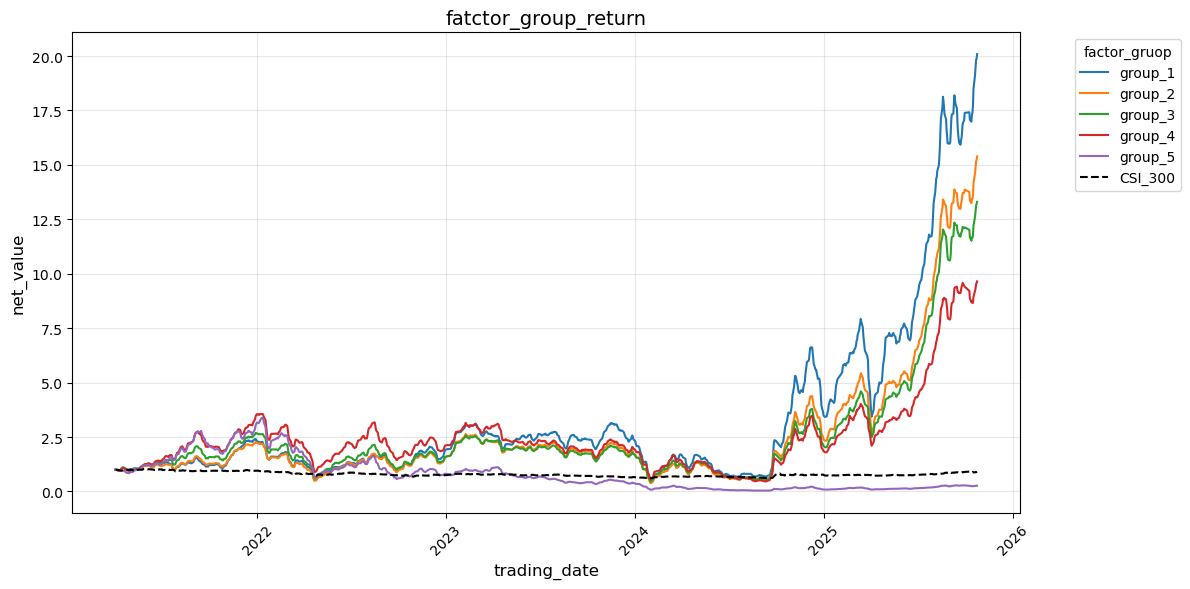

In [8]:
df_plot = group_return_pivot.to_pandas()
df_plot['trading_date'] = pd.to_datetime(df_plot['trading_date'])  # 日期转为 datetime 类型
df_plot = df_plot.set_index('trading_date')  # 用日期作为索引（x轴自动用日期）
# 获取基准指数数据
import tinyshare as tns
ts = tns.pro_api('YzAEH11Yc7jZCHjeJa63fnbpSt3k9Je3GvWn0390oiBKO95bVJjP7u5L34e2ff6b')
index_data = ts.index_daily(ts_code='399300.SZ', start_date=start_date.strftime('%Y%m%d'), end_date=end_date.strftime('%Y%m%d'))
index_data = clean_stocks_data(index_data)
index_data = index_data.sort_values('trading_date')
index_data = index_data.set_index(pd.to_datetime(index_data['trading_date']))
index_data = index_data.loc[df_plot.index]  # 对齐日期
index_data['index_return'] = index_data['close'].pct_change().fillna(0)
index_data['index_net_value'] = (1 + index_data['index_return']).cumprod()

# 4. 绘图（Matplotlib 原生语法）
plt.figure(figsize=(12, 6))
for col in df_plot.columns:
    plt.plot(df_plot.index, df_plot[col], label=col)
plt.plot(index_data['trading_date'], index_data['index_net_value'], label='CSI_300', linestyle='--', color='black')  # 添加基准指数净值曲线

# 图表美化
plt.title('fatctor_group_return', fontsize=14)  # 修正标签：净值而非收益率
plt.xlabel('trading_date', fontsize=12)
plt.ylabel('net_value', fontsize=12)  # 明确净值含义
plt.legend(title='factor_gruop', bbox_to_anchor=(1.05, 1), loc='upper left')  # 图例放右侧，避免遮挡
plt.grid(alpha=0.3)  # 网格透明度调整，更美观
plt.xticks(rotation=45)  # 日期旋转45度，避免重叠
plt.tight_layout()  # 自动调整布局，防止标签被截断

# 显示图片
plt.show()

开始因子综合分析: 2021-01-01 至 2025-11-01 | 持仓周期5天 | 调仓频率5天
有效交易日: 1105 | 调仓日数量: 221

==== 一、每日IC/IR分析 ====
IC均值: -0.0341 | IC_IR: -0.3636 | IC>0占比: 36.18%
RankIC均值: -0.0519 | RankIC_IR: -0.4804

==== 二、因子分层收益分析 ====

分组收益统计（基于所有交易日）:
  factor_group  mean_daily_return  std_return  annual_return  sharpe_ratio  \
0           G1             0.0035      0.0395         0.1758       31.5800   
1           G2             0.0030      0.0363         0.1504       29.3801   
2           G3             0.0029      0.0348         0.1441       29.4364   
3           G4             0.0026      0.0348         0.1324       26.9888   
4           G5            -0.0005      0.0379        -0.0229       -4.2918   

   max_drawdown  positive_ratio  sample_count  
0       -0.3207          0.5618          1100  
1       -0.2967          0.5418          1100  
2       -0.2823          0.5436          1100  
3       -0.3524          0.5418          1100  
4       -0.5972          0.5036          1100  
2025-12-03 22:34

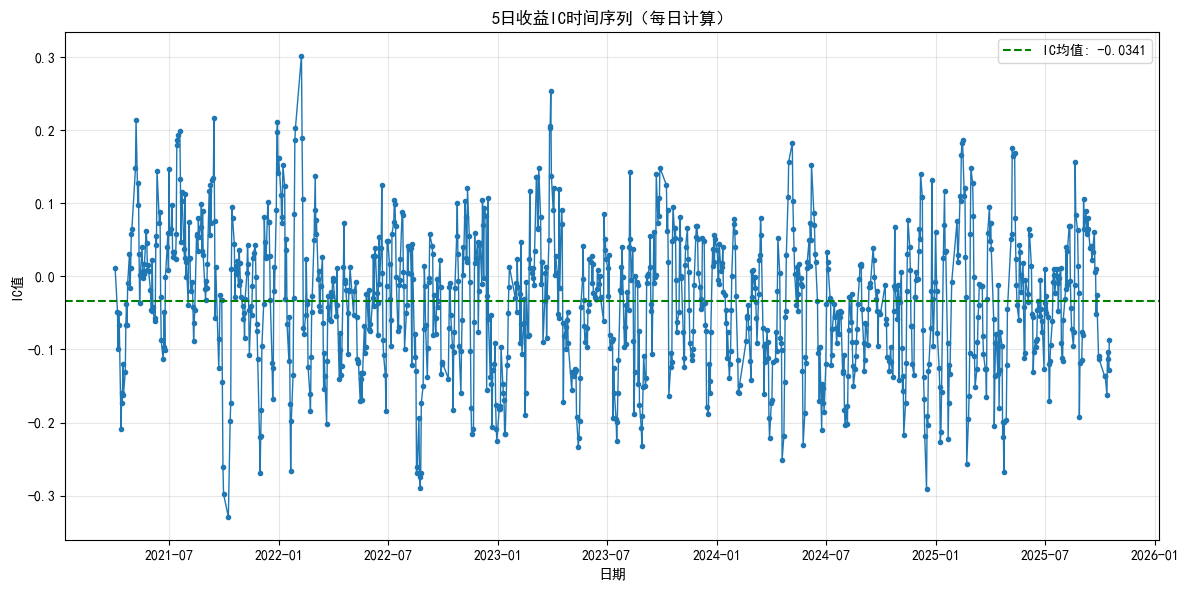

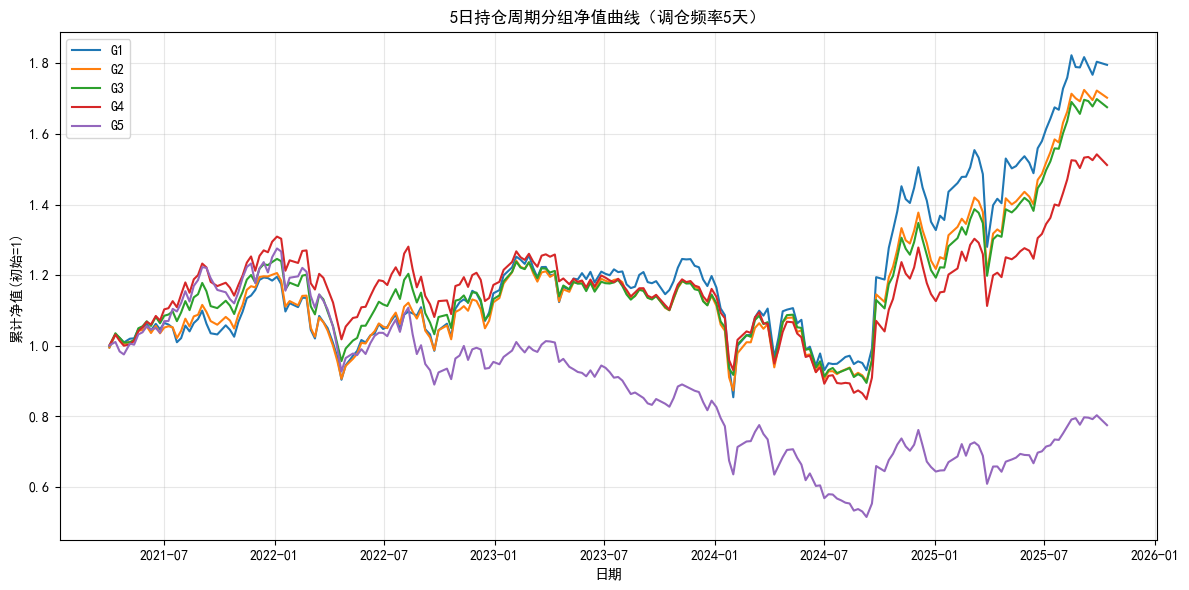

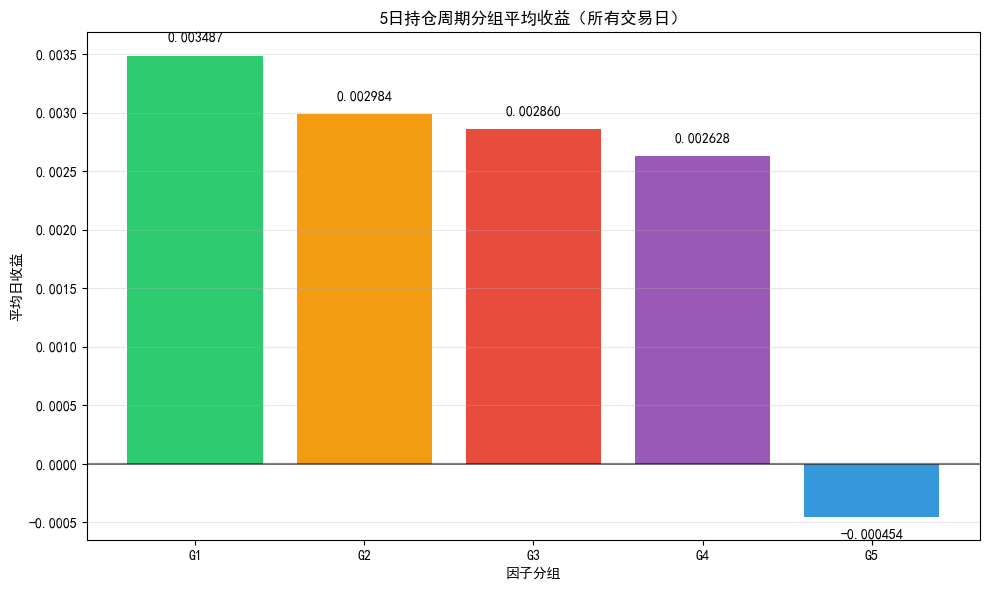

In [ ]:
from alpha import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
warnings.filterwarnings('ignore')
from alpha import *

def analyze_factor(factor_data, stock_data, start_date, end_date, adjust_freq=1,
                   return_period=5, group_num=5, save_result=False):
    """
    简化版因子分析函数：仅分析指定持仓周期的因子表现
    核心功能：
    1. 每日IC/IR分析（指定持仓周期）
    2. 每日因子分组收益统计 + 调仓日净值曲线分析
    :param factor_data: DataFrame，因子数据(宽数据格式)
    :param stock_data: DataFrame，股票日线数据(长数据格式)
    :param start_date: str，分析开始时间
    :param end_date: str，分析结束时间
    :param adjust_freq: int，调仓频率（仅作用于净值曲线），默认每日调仓
    :param return_period: int，分析的未来收益周期(持仓周期)，默认5天
    :param group_num: int, 因子分组数量，默认5组
    :param save_result: bool，是否保存分析结果和图表
    :return: dict，包含IC分析、分组收益、净值数据
    """
    # 基础配置
    print(f"开始因子综合分析: {start_date} 至 {end_date} | 持仓周期{return_period}天 | 调仓频率{adjust_freq}天")
    output_dir = '因子分析结果'
    os.makedirs(output_dir, exist_ok=True) if save_result else None
    
    # ===================== 1. 数据预处理 =====================
    # 日期格式统一
    for df in [factor_data, stock_data]:
        df['trading_date'] = pd.to_datetime(df['trading_date'])
    start_date, end_date = pd.to_datetime(start_date), pd.to_datetime(end_date)
    
    # 因子宽转长 + 时间筛选
    factor_data = factor_data.melt(id_vars=['trading_date'], var_name='code', value_name='factor')
    factor_data = factor_data[(factor_data['trading_date'] >= start_date) & (factor_data['trading_date'] <= end_date)]
    stock_data = stock_data[(stock_data['trading_date'] >= start_date) & (stock_data['trading_date'] <= end_date)]
    
    # 交易日配置
    all_dates = sorted(factor_data['trading_date'].unique())
    rebalance_dates = all_dates[::adjust_freq]
    print(f"有效交易日: {len(all_dates)} | 调仓日数量: {len(rebalance_dates)}")
    
    # 计算单周期未来收益率
    return_col = f'future_return_{return_period}d'
    stock_data = stock_data.sort_values(['code', 'trading_date'])
    stock_data[return_col] = stock_data.groupby('code')['close'].shift(-return_period) / stock_data['close'] - 1
    
    # 合并数据
    merged_all = pd.merge(factor_data, stock_data, on=['trading_date', 'code'], how='inner')
    merged_all = merged_all.dropna(subset=['factor'])
    
    # ===================== 2. 每日IC/IR分析 =====================
    print("\n==== 一、每日IC/IR分析 ====")
    ic_results = []
    
    # 批量计算每日IC（简化循环逻辑）
    for trade_date, day_data in merged_all.groupby('trading_date'):
        if len(day_data) < 30:
            continue
        
        valid_data = day_data.dropna(subset=[return_col])
        if len(valid_data) < 30:
            continue
        
        # 计算IC和RankIC
        ic = valid_data['factor'].corr(valid_data[return_col], method='pearson')
        rank_ic = valid_data['factor'].corr(valid_data[return_col], method='spearman')
        
        ic_results.append({
            'trading_date': trade_date,
            'ic': ic,
            'rank_ic': rank_ic,
            'sample_size': len(valid_data)
        })
    
    # IC统计汇总（简化版）
    ic_df = pd.DataFrame(ic_results)
    if not ic_df.empty:
        ic_stats = {
            'ic_mean': ic_df['ic'].mean(),
            'ic_std': ic_df['ic'].std(),
            'ic_ir': ic_df['ic'].mean() / ic_df['ic'].std() if ic_df['ic'].std() != 0 else np.nan,
            'ic_positive_ratio': (ic_df['ic'] > 0).mean(),
            'rank_ic_mean': ic_df['rank_ic'].mean(),
            'rank_ic_ir': ic_df['rank_ic'].mean() / ic_df['rank_ic'].std() if ic_df['rank_ic'].std() != 0 else np.nan
        }
        # 打印IC结果
        print(f"IC均值: {ic_stats['ic_mean']:.4f} | IC_IR: {ic_stats['ic_ir']:.4f} | IC>0占比: {ic_stats['ic_positive_ratio']:.2%}")
        print(f"RankIC均值: {ic_stats['rank_ic_mean']:.4f} | RankIC_IR: {ic_stats['rank_ic_ir']:.4f}")
    
    # ===================== 3. 因子分组（每日标记 + 收益统计） =====================
    print("\n==== 二、因子分层收益分析 ====")
    # 核心优化：用groupby + apply批量标记每日分组（简化循环）    
    def assign_group(day_data):
        """单日因子分组函数（简化版）"""
        if len(day_data) < group_num * 10:
            day_data['factor_group'] = np.nan
            return day_data
        
        try:
            day_data['factor_group'] = pd.qcut(
                day_data['factor'], 
                q=group_num, 
                labels=[f'G{i+1}' for i in range(group_num)],
                duplicates='drop'
            )
        except:
            day_data['factor_group'] = np.nan
        return day_data
    
    # 批量标记所有交易日分组
    print("开始标记每日因子分组,顺序G1-Gn从小到大")
    merged_all = merged_all.groupby('trading_date',group_keys=False).apply(assign_group)
    merged_all_grouped = merged_all.dropna(subset=['factor_group', return_col])
    
    # 每日分组收益统计（简化版）
    daily_group_returns = merged_all_grouped.groupby(['trading_date', 'factor_group'])[return_col].agg([
        ('mean', 'mean'), ('count', 'count')
    ]).reset_index()
    
    # 调仓日净值计算
    rebalance_returns = daily_group_returns[daily_group_returns['trading_date'].isin(rebalance_dates)]
    if not rebalance_returns.empty:
        # 净值计算（仅调仓日）
        nav_df = rebalance_returns.pivot_table(
            index='trading_date', 
            columns='factor_group', 
            values='mean'
        ).fillna(0)
        nav_df = (1 + nav_df).cumprod()
    else:
        print(f"警告：无有效调仓日收益数据")
        nav_df = pd.DataFrame()
    
    # 分组收益统计（简化版）
    group_stats = []
    for group in [f'G{i+1}' for i in range(group_num)]:
        if group not in daily_group_returns['factor_group'].unique():
            continue
        
        group_data = daily_group_returns[daily_group_returns['factor_group'] == group]['mean']
        mean_return = group_data.mean()
        std_return = group_data.std()
        
        # 年化收益/夏普（简化版）
        annual_return = mean_return * 252 / return_period
        sharpe = (annual_return / std_return) * np.sqrt(252 / return_period) if std_return != 0 else np.nan
        
        # 最大回撤（仅调仓日净值）
        max_dd = np.nan
        if group in nav_df.columns:
            peak = nav_df[group].expanding().max()
            max_dd = ((nav_df[group] - peak) / peak).min()
        
        group_stats.append({
            'factor_group': group,
            'mean_daily_return': mean_return,
            'std_return': std_return,
            'annual_return': annual_return,
            'sharpe_ratio': sharpe,
            'max_drawdown': max_dd,
            'positive_ratio': (group_data > 0).mean(),
            'sample_count': len(group_data)
        })
    
    # 打印分组统计
    group_stats_df = pd.DataFrame(group_stats)
    print("\n分组收益统计（基于所有交易日）:")
    print(group_stats_df.round(4))
    
    # ===================== 4. 可视化（简化版） =====================
    import matplotlib.pyplot as plt
    
    plt.rcParams["font.family"] = ["SimHei"]  # 中文显示
    plt.rcParams["axes.unicode_minus"] = False  # 负号显示
    # IC时间序列图
    if not ic_df.empty:
        plt.figure(figsize=(12, 6))
        plt.plot(ic_df['trading_date'], ic_df['ic'], marker='o', markersize=3, linewidth=1, color='#1f77b4')
        plt.axhline(y=ic_df['ic'].mean(), color='g', linestyle='--', label=f'IC均值: {ic_df["ic"].mean():.4f}')
        plt.title(f'{return_period}日收益IC时间序列（每日计算）')
        plt.xlabel('日期'), plt.ylabel('IC值'), plt.grid(alpha=0.3), plt.legend()
        plt.tight_layout() 
        plt.savefig(f'{output_dir}/ic_timeseries.png', dpi=300) if save_result else None
        plt.show()
        plt.close()
    
    # 调仓日净值曲线（移除多空曲线）
    if not nav_df.empty:
        plt.figure(figsize=(12, 6))
        for col in nav_df.columns:
            plt.plot(nav_df.index, nav_df[col], label=col, linewidth=1.5)
        plt.title(f'{return_period}日持仓周期分组净值曲线（调仓频率{adjust_freq}天）')
        plt.xlabel('日期'), plt.ylabel('累计净值(初始=1)'), plt.grid(alpha=0.3), plt.legend()
        plt.tight_layout()
        plt.savefig(f'{output_dir}/group_nav.png', dpi=300) if save_result else None
        plt.show()
        plt.close()
    
    # 分组平均收益柱状图
    group_mean = daily_group_returns.groupby('factor_group')['mean'].mean().reset_index()
    plt.figure(figsize=(10, 6))
    bars = plt.bar(group_mean['factor_group'], group_mean['mean'], 
                    color=['#2ecc71', '#f39c12', '#e74c3c', '#9b59b6', '#3498db'][:group_num])
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    
    # 数值标签
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + (0.0001 if height>0 else -0.0001),
                f'{height:.6f}', ha='center', va='bottom' if height>0 else 'top')
    
    plt.title(f'{return_period}日持仓周期分组平均收益（所有交易日）')
    plt.xlabel('因子分组'), plt.ylabel('平均日收益'), plt.grid(alpha=0.3, axis='y')
    plt.tight_layout() 
    plt.savefig(f'{output_dir}/group_return.png', dpi=300) if save_result else None
    plt.show()
    plt.close()
    
    # ===================== 5. 结果保存（简化版） =====================
    if save_result:
        # 保存核心结果
        ic_df.to_csv(f'{output_dir}/ic_daily.csv', index=False, encoding='utf-8-sig')
        group_stats_df.to_csv(f'{output_dir}/group_stats.csv', index=False, encoding='utf-8-sig')
        daily_group_returns.to_csv(f'{output_dir}/daily_group_returns.csv', index=False, encoding='utf-8-sig')
        if not nav_df.empty:
            nav_df.to_csv(f'{output_dir}/nav_rebalance.csv', encoding='utf-8-sig')
        
        # 简易报告
        with open(f'{output_dir}/analysis_report.txt', 'w', encoding='utf-8') as f:
            f.write(f"因子分析报告（持仓周期{return_period}天）\n")
            f.write(f"分析区间: {start_date.strftime('%Y-%m-%d')} 至 {end_date.strftime('%Y-%m-%d')}\n")
            f.write(f"调仓频率: {adjust_freq}天 | 分组数量: {group_num}\n\n")
            f.write("IC统计:\n" + pd.Series(ic_stats).round(4).to_string() + "\n\n")
            f.write("分组收益统计:\n" + group_stats_df.round(4).to_string(index=False))
    
    # ===================== 6. 返回结果（简化版） =====================
    return {
        'ic_df': ic_df,                  # 每日IC数据
        'ic_stats': ic_stats if 'ic_stats' in locals() else {},  # IC统计
        'daily_group_returns': daily_group_returns,  # 每日分组收益
        'nav_df': nav_df,                # 调仓日净值
        'group_stats': group_stats_df    # 分组收益统计
    }
res = analyze_factor(factor_data,stock_data=stock_data.to_pandas(),start_date=start_date,end_date=end_date,adjust_freq=5,return_period=5,save_result=True)